In [1]:
import pandas as pd
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.cm as cm

In [2]:
# 파일명
file_name = 'LPMS_E_0_0.00_20890613195022511_RAW.csv'

# Daraframe형식으로 엑셀 파일 읽기
df = pd.read_csv(file_name)

# 데이터 프레임 출력
df

,idx,V-101,V-102,V-103,V-104,V-105,V-106,V-107,V-108,V-109,V-110,V-111,V-112,V-113,V-114,V-115,V-116,V-117,V-118
0,0,0.105690,0.117723,0.124105,-0.020226,0.081804,-0.012730,0.092720,0.116768,0.016436,0.096893,0.135067,0.123524,0.108623,0.112940,0.127729,-0.003574,0.080408,0.095808
1,1,0.113136,0.127748,0.132181,-0.020550,0.094101,-0.012730,0.105982,0.116768,0.016436,0.107248,0.145727,0.133223,0.120596,0.109060,0.137751,0.002245,0.086542,0.106482
2,2,0.111517,0.124838,0.131212,-0.018288,0.089571,-0.012730,0.101129,0.116768,0.016111,0.103041,0.141527,0.129019,0.117361,0.110678,0.134840,-0.000988,0.086864,0.101954
3,3,0.104073,0.112225,0.121521,-0.019257,0.075655,-0.012730,0.086575,0.116444,0.016760,0.092039,0.128605,0.117704,0.102799,0.110031,0.122234,-0.010042,0.076534,0.089338
4,4,0.112812,0.128073,0.132181,-0.018288,0.093130,-0.012730,0.104042,0.116444,0.016111,0.107571,0.147018,0.133545,0.121244,0.107120,0.137751,0.003538,0.088156,0.107775
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19995,0.114756,0.130013,0.137348,-0.019581,0.107693,-0.012405,0.117628,0.116768,0.015465,0.116955,0.155743,0.142920,0.129658,0.111324,0.145830,0.008066,0.095259,0.117477
19996,19996,0.110546,0.123222,0.132503,-0.018610,0.095396,-0.012405,0.105013,0.117090,0.015465,0.108219,0.148634,0.135162,0.119949,0.113911,0.136780,0.002569,0.087833,0.108421
19997,19997,0.109575,0.120958,0.130566,-0.018934,0.091835,-0.013052,0.101778,0.116121,0.014818,0.104012,0.142496,0.130312,0.118654,0.110678,0.136133,-0.000988,0.084604,0.104218
19998,19998,0.110222,0.129044,0.128303,-0.020872,0.101221,-0.013052,0.108570,0.116121,0.015141,0.110807,0.148634,0.136778,0.122215,0.110353,0.137426,0.004509,0.086542,0.111332


### 시간-주파수

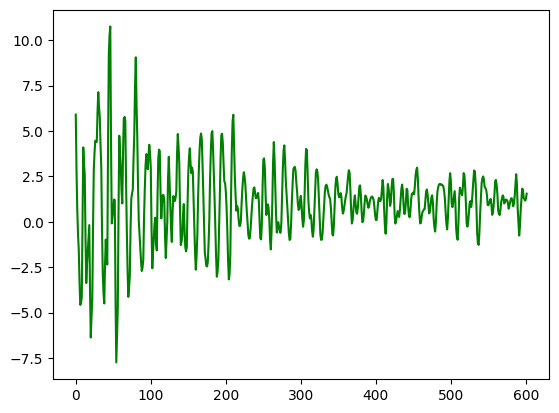

3000    5.899754
3001    2.814713
3002    0.652256
3003   -0.671768
3004   -1.552277
          ...   
3597    1.315880
3598    1.244659
3599    1.160488
3600    1.270561
3601    1.545715
Name: V-101, Length: 602, dtype: float64


In [3]:
# 0.1sec 동안 20000개
N = 20000
dt = 0.000005 
fs = N*10
FrameSize = 602
t = np.arange(FrameSize)
nFFT = 128

# 데이터 보정 10을 곱해야 됨. (나중에 왜 이런식으로 데이터를 저장해놓았는지 여쭤보기)
l = 3000
v101 = df['V-101'][l:l+FrameSize]*10

plt.plot(t, v101, color='green')

plt.show()
print(v101)

In [4]:
v101 = v101.to_numpy()

In [5]:
v101.shape
v101[:10]

array([ 5.899754 ,  2.814713 ,  0.652256 , -0.6717682, -1.552277 ,
       -3.303604 , -4.58231  , -4.456043 , -4.167938 ,  0.2896881])

In [6]:
win = signal.windows.hann(nFFT)

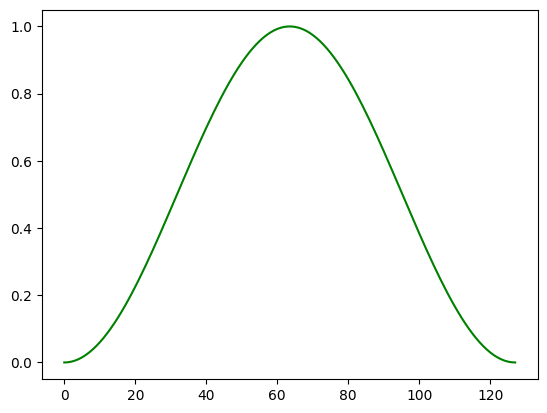

In [7]:
plt.plot(np.arange(nFFT), win, color='green')
plt.show()

In [8]:
# SFT = signal.ShortTimeFFT(win=win, hop=1, fs=fs, scale_to='psd', phase_shift=0)
SFT = signal.ShortTimeFFT(win=win, hop=1, fs=fs, scale_to='magnitude', phase_shift=0)
zData = SFT.stft(v101, p0=0, p1=FrameSize)
absZ = np.abs(zData)
print("zData: ", absZ.shape)

zData:  (65, 602)


In [9]:
xData = np.arange(1, FrameSize+1)*SFT.delta_t
# yData = np.arange(1, nFFT+1)*SFT.delta_f
yData = SFT.f
print("xData : ", xData.shape)
print("yData : ", yData.shape)

xData :  (602,)
yData :  (65,)


In [10]:
colorMax, colorMin = absZ.max(), absZ.min()
# Black #000000
# magenta #c20078
# Blue #0343df
# Cyan #00ffff
# Green #15b01a
# yellow #ffff14
# OrangeRed #fe420f
# Red #e50000
# White #ffffff
colors = ['#000000', '#c20078', '#0343df', '#00ffff', '#15b01a', '#ffff14', '#fe420f', '#e50000', '#ffffff']

norm = plt.Normalize(colorMin, colorMax)
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)

levels = [0, colorMin]
for i in range(1, 8): levels.append(colorMin + i * (colorMax - colorMin) / 9)
levels.append(colorMax)

colormapping = cm.ScalarMappable(norm=norm, cmap=cmap)
levels

[0,
 1.6581658601633187e-05,
 0.24118623890255314,
 0.48235589614650465,
 0.7235255533904561,
 0.9646952106344077,
 1.205864867878359,
 1.4470345251223105,
 1.6882041823662624,
 2.1705434968541653]

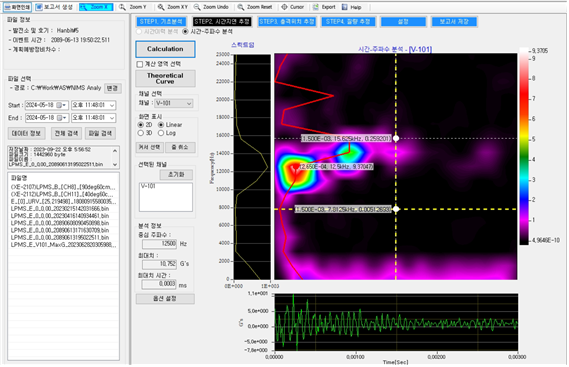

### 가운데 그래프

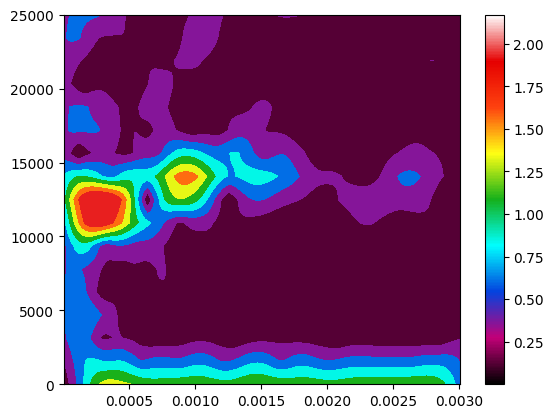

In [11]:
plt.ylim([0, 25000])
plt.colorbar(colormapping, ax=plt.gca())
plt.contourf(xData, yData, absZ, levels=levels, cmap=cmap, norm=norm)

### 왼쪽에 있는 그래프

In [12]:
xD = absZ.sum(axis=1)
xD.resize(nFFT)
yD = np.arange(1, nFFT+1)*SFT.delta_f
print("xD : ", xD.shape)
print("yD : ", yD.shape)
print(xD[:5])

xD :  (128,)
yD :  (128,)
[645.5854987  349.6777384   87.10783447  97.56781539  90.54451626]


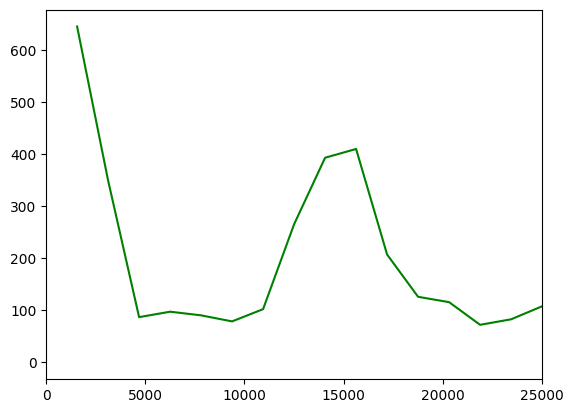

In [13]:
plt.plot(yD, xD, color='green')
plt.xlim([0, 25000])
plt.show()

### 아래에 있는 그래프

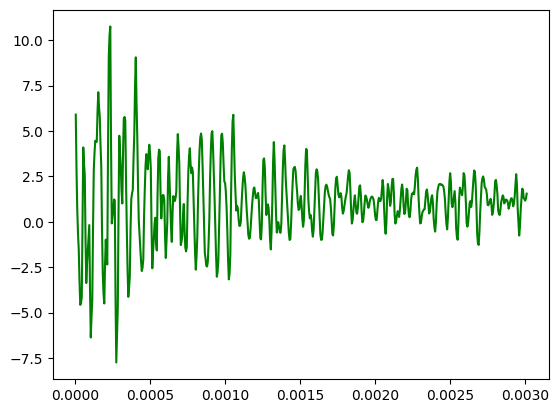

In [14]:
t = np.arange(1, FrameSize+1)*SFT.delta_t
plt.plot(t, v101, color='green')